Ritika Chand <br>


In [ ]:
#Laearning rate and optimizers

In [ ]:
from sklearn.datasets import make_blobs   #importing dadatset from sklearn
from matplotlib import pyplot
from numpy import where

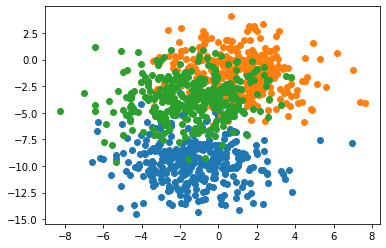

In [ ]:
x,y= make_blobs(n_samples=1000,centers=3,n_features=2,cluster_std=2,random_state=2) #3 classes
for class_v in range(3):
  row_class=where(y==class_v)
  pyplot.scatter(x[row_class,0],x[row_class,1])

In [ ]:
y[4]  #labels of y are 0,1,2 since there are 3 classes

1

In [ ]:
from keras.utils import to_categorical
y=to_categorical(y)

In [ ]:
y[0] # since label of y[0] was 2 thats why column 3 value is 1
# similarly if label is 1 then 2nd column would be 1 and rest 0 

array([0., 0., 1.], dtype=float32)

In [ ]:
n_train=500
trainx,testx=x[:n_train,:],x[n_train:,:]
trainy,testy=y[:n_train,:],y[n_train:,:]

In [ ]:
trainx.shape

(500, 2)

In [ ]:
trainy.shape

(500, 3)

In [ ]:
from keras.layers import Dense
from keras.models import Sequential
model=Sequential() #network architecture
model.add(Dense(50,input_dim=2,activation='relu',kernel_initializer='he_uniform')) # 2 feature thus 2 nurons, initializer sets random weights in uniform manner
model.add(Dense(3,activation='softmax')) #output has 3 labels thus 3 nurons


In [ ]:
from keras.optimizers import SGD
model.compile(loss='categorical_crossentropy',optimizer=SGD(lr=0.001),metrics=['accuracy'])

In [ ]:
history=model.fit(trainx,trainy,validation_data=(testx,testy),epochs=200,verbose=0)

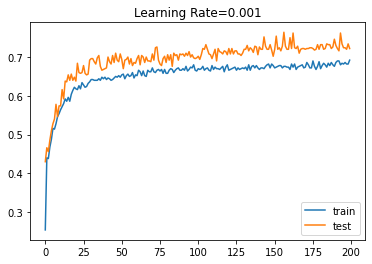

In [ ]:
pyplot.plot(history.history['accuracy'],label='train')
pyplot.plot(history.history['val_accuracy'],label='test')
pyplot.title('Learning Rate=0.001')
pyplot.legend()

In [ ]:
# different learing rates
def pre_data():
  x,y= make_blobs(n_samples=1000,centers=3,n_features=2,cluster_std=2,random_state=2)
  y=to_categorical(y)
  trainx,testx=x[:n_train,:],x[n_train:,:]
  trainy,testy=y[:n_train,:],y[n_train:,:]
  return trainx,trainy,testx,testy


In [ ]:
def fit_model(trainx,trainy,testx,testy,learn_rate):
  model=Sequential() #network architecture
  model.add(Dense(50,input_dim=2,activation='relu',kernel_initializer='he_uniform')) # 2 feature thus 2 nurons, initializer sets random weights in uniform manner
  model.add(Dense(3,activation='softmax'))
  model.compile(loss='categorical_crossentropy',optimizer=SGD(lr=learn_rate),metrics=['accuracy'])
  history=model.fit(trainx,trainy,validation_data=(testx,testy),epochs=200,verbose=0)
  #pyplot.figure(figsize=(10,10))
  pyplot.plot(history.history['accuracy'],label='train')
  pyplot.plot(history.history['val_accuracy'],label='test')
  pyplot.title('Learning Rate= '+str(learn_rate))
  pyplot.legend()



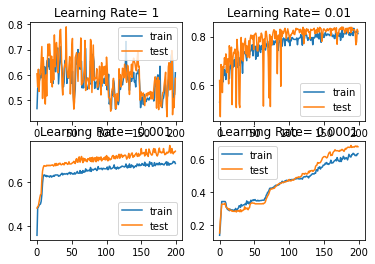

In [ ]:
trainx,trainy,testx,testy= pre_data()
learn_rate=[1,0.01,0.001,0.0001]
for i in range(len(learn_rate)):
  plot_numb=220+ (i+1)
  pyplot.subplot(plot_numb)
  fit_model(trainx,trainy,testx,testy,learn_rate[i])
  

In [ ]:
#momentum

In [ ]:
def fit_model(trainx,trainy,testx,testy,mom):
  model=Sequential() #network architecture
  model.add(Dense(50,input_dim=2,activation='relu',kernel_initializer='he_uniform')) # 2 feature thus 2 nurons, initializer sets random weights in uniform manner
  model.add(Dense(3,activation='softmax'))
  model.compile(loss='categorical_crossentropy',optimizer=SGD(lr=0.01,momentum=mom),metrics=['accuracy'])
  history=model.fit(trainx,trainy,validation_data=(testx,testy),epochs=200,verbose=0)
  #pyplot.figure(figsize=(10,10))
  pyplot.plot(history.history['accuracy'],label='train')
  pyplot.plot(history.history['val_accuracy'],label='test')
  pyplot.title('Learning Rate= '+str(learn_rate))
  pyplot.legend()


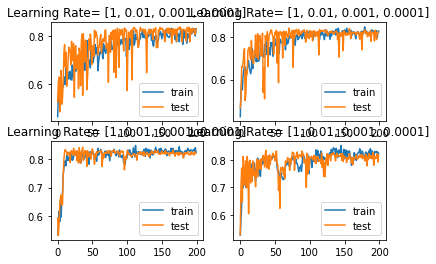

In [ ]:
trainx,trainy,testx,testy= pre_data()
mom_v=[0,0.5,0.9,0.99]
for i in range(len(mom_v)):
  plot_numb=220+ (i+1)
  pyplot.subplot(plot_numb)
  fit_model(trainx,trainy,testx,testy,mom_v[i])
  

In [ ]:
def fit_model(trainx,trainy,testx,testy,opti):
  model=Sequential() #network architecture
  model.add(Dense(50,input_dim=2,activation='relu',kernel_initializer='he_uniform')) # 2 feature thus 2 nurons, initializer sets random weights in uniform manner
  model.add(Dense(3,activation='softmax'))
  model.compile(loss='categorical_crossentropy',optimizer=opti,metrics=['accuracy'])
  history=model.fit(trainx,trainy,validation_data=(testx,testy),epochs=200,verbose=0)
  #pyplot.figure(figsize=(10,10))
  pyplot.plot(history.history['accuracy'],label='train')
  pyplot.plot(history.history['val_accuracy'],label='test')
  pyplot.title('Learning Rate= '+str(learn_rate))
  pyplot.legend()

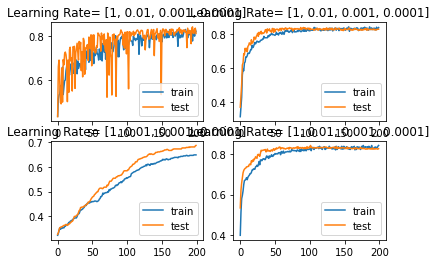

In [ ]:
trainx,trainy,testx,testy= pre_data()
optimiz=['sgd','rmsprop','adagrad','adam']
for i in range(len(optimiz)):
  plot_numb=220+ (i+1)
  pyplot.subplot(plot_numb)
  fit_model(trainx,trainy,testx,testy,optimiz[i])

# **Conclusion**

For the given dataset, different learning rates are used to train the network. Optimum learning rate for the given dataset is 0.001. For this learning rate, training requires at least 50 epochs to reach accuracy of at least 60 percent. To reduce no. of epochs or to train the network fatser, momentum can be used. <br>
It is observed that accuracy of 80 percnet can be achieved with 1o epochs, for momntum= 0.9, for other values of momentum, training requires more no. of epochs.
<br>
Model is trained for different optimizers. rms prop and adam, gave better performance than sgd and adagrad.